<a href="https://colab.research.google.com/github/FCamiloRO/Route/blob/main/Print_Grafo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

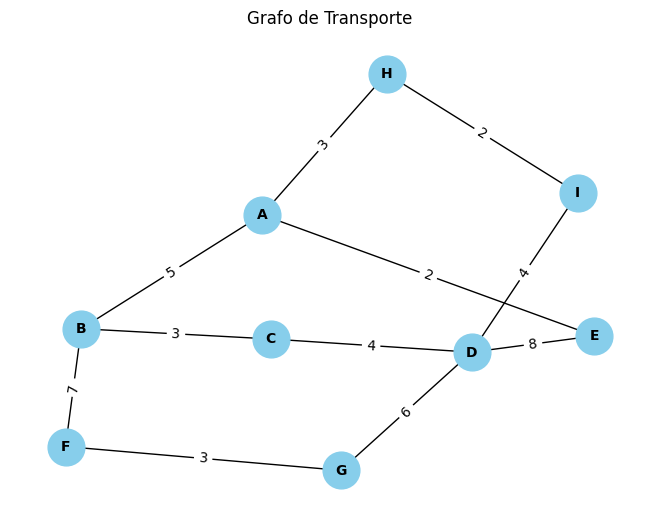

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class GrafoTransporte:
    def __init__(self):
        self.grafo = {}

    def agregar_conexion(self, origen, destino, distancia):
        if origen not in self.grafo:
            self.grafo[origen] = {}
        self.grafo[origen][destino] = distancia

        if destino not in self.grafo:
            self.grafo[destino] = {}
        self.grafo[destino][origen] = distancia

    def obtener_conexiones(self, nodo):
        return self.grafo.get(nodo, {})

# Crear una instancia del grafo y agregar conexiones
grafo_transporte = GrafoTransporte()
grafo_transporte.agregar_conexion('A', 'B', 5)
grafo_transporte.agregar_conexion('B', 'C', 3)
grafo_transporte.agregar_conexion('C', 'D', 4)
grafo_transporte.agregar_conexion('A', 'E', 2)
grafo_transporte.agregar_conexion('E', 'D', 8)
grafo_transporte.agregar_conexion('B', 'F', 7)
grafo_transporte.agregar_conexion('F', 'G', 3)
grafo_transporte.agregar_conexion('G', 'D', 6)
grafo_transporte.agregar_conexion('A', 'H', 3)
grafo_transporte.agregar_conexion('H', 'I', 2)
grafo_transporte.agregar_conexion('I', 'D', 4)

# Crear un grafo de NetworkX y agregar las conexiones del grafo de transporte
G = nx.Graph()
for origen, conexiones in grafo_transporte.grafo.items():
    for destino, distancia in conexiones.items():
        G.add_edge(origen, destino, weight=distancia)

# Dibujar el grafo
pos = nx.spring_layout(G)  # posición de los nodos
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el gráfico
plt.title('Grafo de Transporte')
plt.show()
